## Declaração de bibliotecas e demais configurações

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import csv

from sklearn.neural_network import MLPClassifier

from matplotlib import rcParams
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

## Funções relacionadas ao método ou auxiliares

In [28]:
#Função de leitura dos dados------------------------------------
def read_class_data(path):
    with open(path, newline='') as f:
        reader = csv.reader(f,delimiter=',')
        for row in reader:
            try:
                data = np.vstack( (data , np.asarray(row).astype(np.float) ) )
            except:
                data = np.asarray(row).astype(np.float)
    f.close()
    y = data[:,0]
    x = data[:,1:]
    return y,x

## Leitura dos dados
* Fazemos aqui a leitura dos dados simulados no 'juputer-notebook':"Pratica-SepLin-SimulacaoDados"
* $\texttt{path_Z}$ corresponde aos dados de treinamento/teste

In [33]:
#Dados de treinamento
path_Z = 'conjuntoZ.txt'

#Leitura dos dados
y,x = read_class_data(path_Z)

In [34]:
#Gerar conjunto de treino e avaliação a partir de uma única fonte
N = y.shape[0]
percentAvalia = 0.833

#A ordenação dos valores aleatórios segundo seu índice/argumento
#O resultado é uma nova ordem aleatória (mais conveniente para este caso)
posAleatorias = np.argsort(np.random.uniform(0,1, y.shape[0] ))

#Subconjunto de avaliação
yI = y[ posAleatorias[0: np.int64(np.ceil(N*percentAvalia)) ] ]
xI = x[ posAleatorias[0: np.int64(np.ceil(N*percentAvalia)) ] , :]

#Subconjunto de treino
yD = y[ posAleatorias[np.int64(np.floor(N*percentAvalia)):-1] ]
xD = x[ posAleatorias[np.int64(np.floor(N*percentAvalia)):-1] , :]


## Normalização dos dados...

In [37]:
from sklearn import preprocessing

escalonador = preprocessing.MinMaxScaler()

escalonador.fit(xD)
xD = escalonador.transform(xD)
xI = escalonador.transform(xI)

In [40]:
xI.max()

1.1063126904432306

## Classificação dos dados
---
* "g = MLPClassifier" é a oinstanciação do classificador MLP
* "g.fit" e "g.predict" realiza o treinamento e aplicação do métotdo na predição de classes
---
* Definimos a arquiteturas (segundo $\texttt{hidden_layer_sizes}$):
* Os demais parâmetros podem ser consultados na documentação

In [48]:
arquitetura = (3,3,3)

g = MLPClassifier(solver='lbfgs', hidden_layer_sizes=arquitetura, max_iter=10000, tol=10**(-5),
    activation='tanh', learning_rate='constant', shuffle=True, random_state=1)

g.fit(xD,yD)

MLPClassifier(activation='tanh', hidden_layer_sizes=(3, 3, 3), max_iter=10000,
              random_state=1, solver='lbfgs', tol=1e-05)

## Classificação do espaço de atributos 
### (na verdade, vamos classificar um conjunto ampo de elementos neste espaço!)
* Como já sabemos, a classificação (predição) é realizada pelo método 'predict'
* Para fins de visualização,é preciso compatibilizar os elementos (veja código)

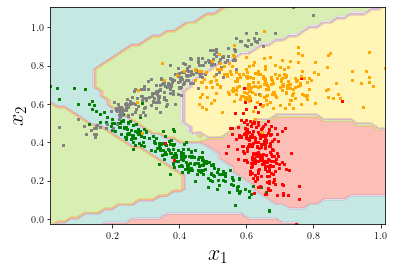

In [49]:
minX, maxX = (np.min(xI[:,0]), np.max(xI[:,0]))
minY, maxY = (np.min(xI[:,1]), np.max(xI[:,1]))

N = 50
X1 = np.linspace(minX, maxX,N)
X2 = np.linspace(minY, maxY,N)
X1, X2 = np.meshgrid(X1, X2)

cla = np.ndarray((N,N))
for i in range(0,N):
    for j in range(0,N):
        cla[i,j] = g.predict( [ [X1[i,j] , X2[i,j]] ] ) 

plt.contourf(X1, X2, cla, cmap=cm.Set3,alpha=0.5)

plt.plot( xI[np.where(yI == 0), 0], xI[np.where(yI == 0), 1], 's', color='green', markersize=2)
plt.plot( xI[np.where(yI == 1), 0], xI[np.where(yI == 1), 1], 's', color='red', markersize=2)
plt.plot( xI[np.where(yI == 2), 0], xI[np.where(yI == 2), 1], 's', color='grey', markersize=2)
plt.plot( xI[np.where(yI == 3), 0], xI[np.where(yI == 3), 1], 's', color='orange', markersize=2)

plt.xlabel(r'$x_1$', fontsize=22)
plt.ylabel(r'$x_2$', fontsize=22)

plt.show()